In [1]:
%load_ext autoreload
%autoreload 2

In [61]:
from everything import do_everything_before, do_everything_between, do_everything_after, get_train_command
import numpy as np
import os
import torch
from srcnn import SRCNN
import matplotlib.pyplot as plt
from PIL import Image
from interpolate import linear_interpolate
from scipy import fft
import tifffile

In [70]:
img1 = np.array(Image.open("superres/real_images/screenshot1.png").convert("L"))
img2 = np.array(Image.open("superres/real_images/screenshot2.png").convert("L"))
img3 = np.array(Image.open("superres/real_images/screenshot3.png").convert("L"))

In [71]:
img1 = (img1/np.max(img1)*255).astype(int)

In [72]:
trench1 = img1[20:130,245:-5]

In [73]:
trench1_upsampled = linear_interpolate(trench1,(256,46),method="cubic")

In [74]:
SR_MODEL = SRCNN()
SR_MODEL.load_state_dict(torch.load("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/SR_training/train/pmc_0.1638_cubic_output/model_ckpt.pth")['model_state_dict'])
SR_MODEL.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [75]:
input = trench1_upsampled.reshape(1,256,46)
input = (input)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    trench1_sr = (np.array(SR_MODEL(input)).reshape((256,46))*255).astype(int)

In [78]:
eg1 = tifffile.imread("superres/second_trial/SR_training/test/pmc_0.1638/convolutions/synth_00031_pmc_0.1638.tif")
eg1_upsampled = linear_interpolate(eg1,(256,46),method="cubic")
input = eg1_upsampled.reshape(1,256,46)
input = (input//256)/255
input = torch.tensor(input, dtype=torch.float)
with torch.no_grad():
    eg1_sr = (np.array(SR_MODEL(input)).reshape((256,46))*255).astype(int)

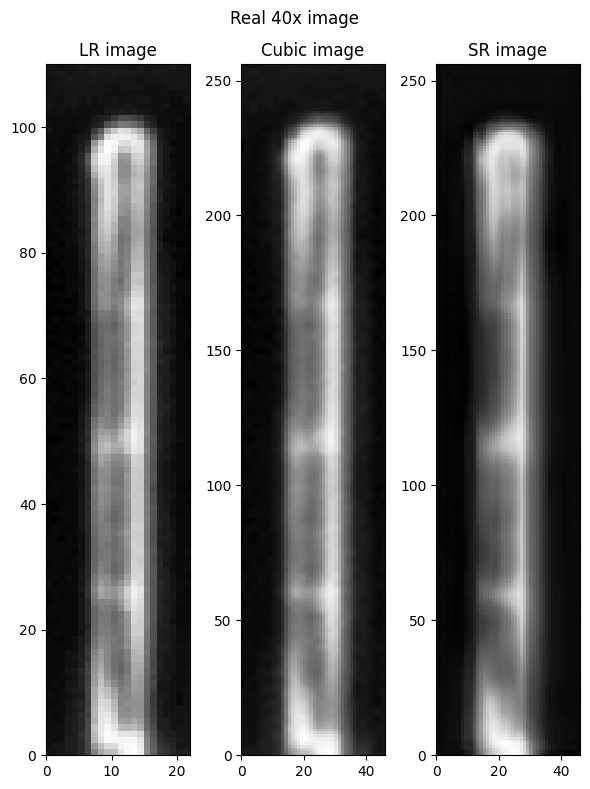

In [85]:
fig, axs = plt.subplots(1,3,figsize=(6,8))
fig.suptitle("Real 40x image")
axs[0].pcolor(trench1[::-1],cmap="Greys_r")
axs[0].set_title("LR image")
axs[1].pcolor(trench1_upsampled[::-1],cmap="Greys_r")
axs[1].set_title("Cubic image")
axs[2].pcolor(trench1_sr[::-1],cmap="Greys_r")
axs[2].set_title("SR image")
fig.tight_layout()
plt.show()

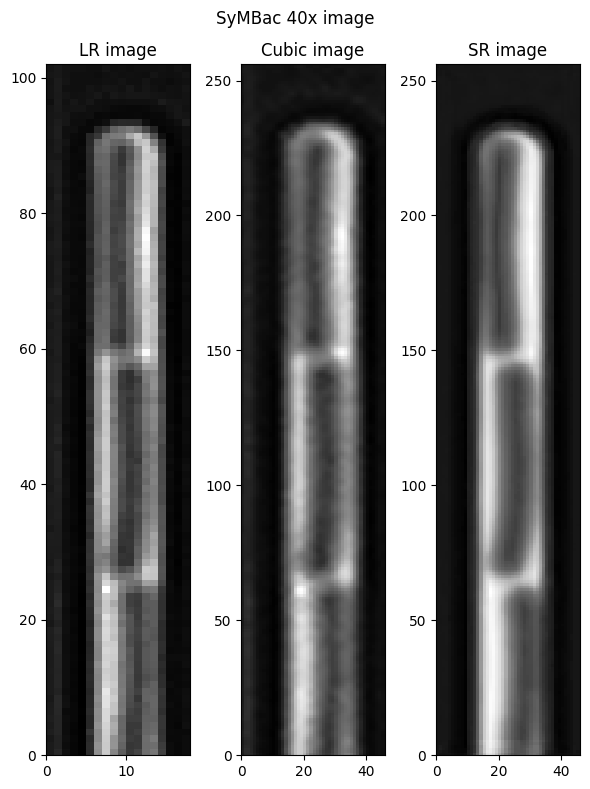

In [86]:
fig, axs = plt.subplots(1,3,figsize=(6,8))
fig.suptitle("SyMBac 40x image")
axs[0].pcolor(eg1[::-1],cmap="Greys_r")
axs[0].set_title("LR image")
axs[1].pcolor(eg1_upsampled[::-1],cmap="Greys_r")
axs[1].set_title("Cubic image")
axs[2].pcolor(eg1_sr[::-1],cmap="Greys_r")
axs[2].set_title("SR image")
fig.tight_layout()
plt.show()

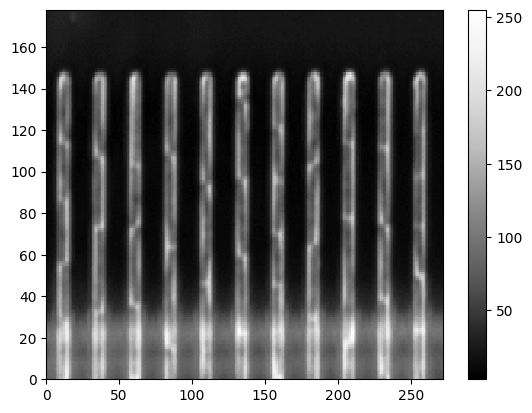

In [80]:
plt.pcolor(img1[::-1],cmap="Greys_r")
plt.colorbar()
plt.show()